# NYC Flights Analysis

In [415]:
#IPython is what you are using now to run the notebook
import IPython
print "IPython version:      %6.6s (need at least 1.0)" % IPython.__version__

# Numpy is a library for working with Arrays
import numpy as np
print "Numpy version:        %6.6s (need at least 1.7.1)" % np.__version__

# SciPy implements many different numerical algorithms
import scipy as sp
print "SciPy version:        %6.6s (need at least 0.12.0)" % sp.__version__

# Pandas makes working with data tables easier
import pandas as pd
print "Pandas version:       %6.6s (need at least 0.11.0)" % pd.__version__

# Module for plotting
import matplotlib
print "Mapltolib version:    %6.6s (need at least 1.2.1)" % matplotlib.__version__
%matplotlib inline

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print "Scikit-Learn version: %6.6s (need at least 0.13.1)" % sklearn.__version__

IPython version:       5.1.0 (need at least 1.0)
Numpy version:        1.11.1 (need at least 1.7.1)
SciPy version:        0.18.1 (need at least 0.12.0)
Pandas version:       0.18.1 (need at least 0.11.0)
Mapltolib version:     1.5.3 (need at least 1.2.1)
Scikit-Learn version: 0.17.1 (need at least 0.13.1)


 
In this problem set you will perform a basic exploratory analysis on an example dataset, bringing to bear all of your new skills in data manipulation and visualization. You will be required to submit well commented python code, documenting all code used in this problem set, along with a write up answering all questions below. Use figures as appropriate to support your answers, and when required by the problem. 
This data set uses the NYCFlights13 dataset. You can download the dataset from canvas.

In [416]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [417]:
flights_df= pd.read_csv('flights.csv')

In [418]:
print flights_df.shape
print flights_df.columns
print flights_df.dtypes

(336776, 17)
Index([u'Unnamed: 0', u'year', u'month', u'day', u'dep_time', u'dep_delay',
       u'arr_time', u'arr_delay', u'carrier', u'tailnum', u'flight', u'origin',
       u'dest', u'air_time', u'distance', u'hour', u'minute'],
      dtype='object')
Unnamed: 0      int64
year            int64
month           int64
day             int64
dep_time      float64
dep_delay     float64
arr_time      float64
arr_delay     float64
carrier        object
tailnum        object
flight          int64
origin         object
dest           object
air_time      float64
distance        int64
hour          float64
minute        float64
dtype: object


In [419]:
flights_df.dest.unique()
flights_df.head(10)

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
5,6,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0
6,7,2013,1,1,555.0,-5.0,913.0,19.0,B6,N516JB,507,EWR,FLL,158.0,1065,5.0,55.0
7,8,2013,1,1,557.0,-3.0,709.0,-14.0,EV,N829AS,5708,LGA,IAD,53.0,229,5.0,57.0
8,9,2013,1,1,557.0,-3.0,838.0,-8.0,B6,N593JB,79,JFK,MCO,140.0,944,5.0,57.0
9,10,2013,1,1,558.0,-2.0,753.0,8.0,AA,N3ALAA,301,LGA,ORD,138.0,733,5.0,58.0


##Some Tips

* This assignment involves extensive Data frame splitting and aggregation. You should look into the details of the methods groupby, transform, sum, count, mean etc
* Many of the tasks in the assignment can be done either through the Pandas Data Frame or by converting the data frames to Series. Many of the methods in the numpy are applicable to Series only. When stuck, try to explore the type of object (Pandas Data Frame or Numpy Series) you are dealing with.

##Question 1
Let’s explore flights from NYC to Seattle. Use the flights dataset to answer the following questions.

(a) How many flights were there from NYC airports to Seattle in 2013?

In [420]:
#Converting the dataset into a dataframe
flightsdf=pd.DataFrame(flights_df)

We converted the above object into a dataframe using the `pd.DataFrame` function

In [421]:
#Subsetting the flights with their destination as Seattle
nsea=flightsdf[flightsdf.dest=="SEA"]

#Finding the number of flights
len(nsea)

3923

The number of flights from NYC airports to Seattle are 3923.

(b) How many airlines fly from NYC to Seattle?

In [422]:
#Subsetting the airlines that fly to Seattle
nair=flightsdf[flightsdf.dest=="SEA"].groupby(flightsdf['carrier'])

#Finding the number of airlines
len(nair)


5

The number of airlines that fly from NYC to Seattle are 5. 

(c) How many unique air planes fly from NYC to Seattle?

In [423]:
#Subsetting the unique airplanes that fly to Seattle
nfly=flightsdf[flightsdf.dest=="SEA"].groupby(flightsdf['tailnum'])

#Finding the number of airplanes
len(nfly)

935

The number of unique air planes flying from NYC to Seattle are 935.

(d) What is the average arrival delay for flights from NC to Seattle?

In [424]:
#Subsetting the flights with the destination Seattle
ndelay=flightsdf[flightsdf.dest=="SEA"]

#Finding the average arrival delay for these flights
ndel=ndelay['arr_delay'].mean()

#Printing the average arrival delay
print ndel

-1.0990990991


The average arrival delay for flights from NYC to Seattle is -1.099 minutes which shows that these flights arrive 1.099 minutes early on average.

(e) What proportion of flights to Seattle come from each NYC airport?

In [425]:
#Subsetting the flights with the destination Seattle
nprop=flightsdf[flightsdf.dest=="SEA"]

#Grouping these flights by the origin and counting them
nprop = pd.DataFrame(nprop.groupby('origin').size().rename('count'))

#Fid=nding the proportion of flights from the origin airports
nprop['prop']=nprop.apply(lambda count: count/float(count.sum()))

#Printing the proportion of flights by origin airport
print nprop


        count      prop
origin                 
EWR      1831  0.466735
JFK      2092  0.533265


Flights from NYC to Seattle take place only from two origin airports i.e. EWR and JFK. There are no flights from LGA. The proportion of flights from EWR is 0.4667 and from JFK is 0.5332.

## Question 2
Flights are often delayed. Consider the following questions exploring delay patterns.

(a) Which date has the largest average departure delay? Which date has the largest average arrival delay?

In [426]:
#Method 1
#Creating a new `date` column
flightsdf['date'] = flightsdf['month'].astype(str) + "-" + flightsdf['day'].astype(str) + "-" + flightsdf['year'].astype(str)

#Grouping and averaging the mean dealy by date
avgday=pd.DataFrame(flightsdf.groupby('date').mean())

#Sorting the values in descending order for maximum departure delay
avgday=avgday.sort_values(['dep_delay'], ascending = False)

#Printing the maximum
print "Date with largest average departure delay"
print avgday['dep_delay'].head(1)

#Sorting the values in descending order for maximum arrival delay
avgday=avgday.sort_values(['arr_delay'], ascending = False)

#Printing the maximum
print "Date with largest average arrival delay"
print avgday['arr_delay'].head(1)

Date with largest average departure delay
date
3-8-2013    83.536921
Name: dep_delay, dtype: float64
Date with largest average arrival delay
date
3-8-2013    85.862155
Name: arr_delay, dtype: float64


In [427]:
#Method 2
#Finding the average by grouping certain columns with `day`,`month`,`year`
avg = pd.DataFrame(flightsdf[["day", "month", "year", "dep_delay", "arr_delay"]].
             groupby(["day", "month", "year"]).mean()).reset_index()

#Finding the maximum value for average departure delay
print avg[avg["dep_delay"] == np.max(avg.dep_delay)]

#Finding the maximum value for average arrival delay
print avg[avg["arr_delay"] == np.max(avg.arr_delay)]

    day  month  year  dep_delay  arr_delay
86    8      3  2013  83.536921  85.862155
    day  month  year  dep_delay  arr_delay
86    8      3  2013  83.536921  85.862155


In the above cells, we have used 2 different methods to find the days with the largest mean departure and arrival delays. 

In the first method we concatenated a date column using `month`, `day` and `year`. We then grouped the data using this column and found the mean. We then sorted the values for arrival delay and departure delay in descending order which gave us the answer. 

In the second method we grouped the relevant columns using `day`,`month` and `year`. We then proceeded to find the mean and print the days with the meximum mean departure and arrival delays.

The answers for the highest mean departure delay and highest mean arrival delay is the same.

Date with largest mean departure delay: March 8th,2013
Date with the largest mean arrival delay: March 8th, 2013



(b) What was the worst day to fly out of NYC in 2013 if you dislike delayed flights?


In [428]:
#Method 1. Day with largest departure delay

#Sorting the values in descending order for maximum departure delay
avgday=avgday.sort_values(['dep_delay'], ascending = False)

#Printing the maximum
print "Date with largest average departure delay"
print avgday['dep_delay'].head(1)

#Method 2. Day with highest number of delayed flights

#Subsetting the rows with flight delays
delay=flightsdf[flightsdf['dep_delay']>0]

#Grouping using the date and counting the number of delayed flights
delay=pd.DataFrame(delay.groupby('date').count())

#Sorting the values in descending order
delay=delay.sort_values(["dep_delay"],ascending= False)

#Printing the maximum
print delay['dep_delay'].head(1)


Date with largest average departure delay
date
3-8-2013    83.536921
Name: dep_delay, dtype: float64
date
12-23-2013    674
Name: dep_delay, dtype: int64


There can be multiple ways to approach this question.  The 2 ways I hav used are outlined below.

In the 1st method, I used the logic of Q2(a) and found the worst day by seeing which day has the highest mean departure delay from NYC. The answer for this was March 8th, 2013.

In the 2nd method, I wanted to see which day has the maximum number of delayed flights as such a metric would also affect all the passengers. To do this, I first subsetted the flights with flight delays and grouped them using the `date` column we had created and counted the values. I then sorted the values in descending order to get the top value. The answer using this method is December 23th, 2013.

(c) Are there any seasonal patterns in departure delays for flights from NYC?

Months sorted by descending values of average departure delay
month
7     21.727787
6     20.846332
12    16.576688
4     13.938038
3     13.227076
5     12.986859
8     12.611040
2     10.816843
1     10.036665
9      6.722476
10     6.243988
11     5.435362
Name: dep_delay, dtype: float64


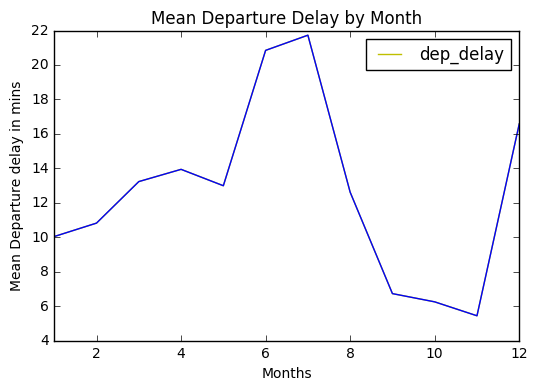

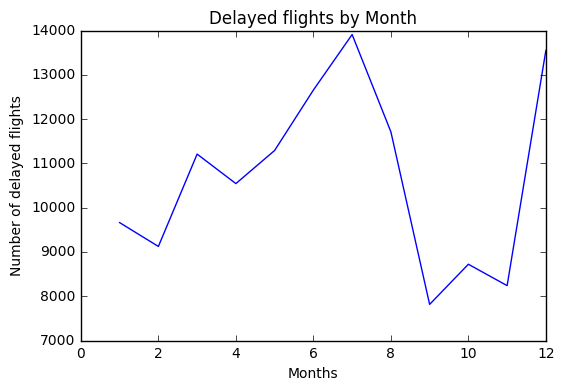

Months sorted by descending values of number of flights delayed
month
7     13909
12    13550
6     12655
8     11713
5     11291
3     11209
4     10543
1      9662
2      9124
10     8722
11     8239
9      7815
Name: dep_delay, dtype: int64


In [429]:
#Method 1. Average departure delay by month

#Grouping and averaging the mean dealy by month
avgmonth=pd.DataFrame(flightsdf['dep_delay'].groupby(flightsdf['month']).mean())

#Creating a plot
avgmonth.plot(color='y')

#Sorting the values in descending order for maximum departure delay
avgmonth=avgmonth.sort_values(['dep_delay'], ascending = False)

#Printing the values
print "Months sorted by descending values of average departure delay"
print avgmonth['dep_delay']

#Method 2. Number of flights delayed per month

#Subsetting the rows with flight delays
delaymon=flightsdf[flightsdf['dep_delay']>0]

#Grouping using the date and counting the number of delayed flights
delaymon1=pd.DataFrame(delaymon['dep_delay'].groupby(delaymon['month']).count())

#Creating a plot
plt.plot(flightsdf.groupby('month')['dep_delay'].mean())

#X axis label
plt.xlabel('Months')

#Y Axis label
plt.ylabel('Mean Departure delay in mins')

#Title
plt.title('Mean Departure Delay by Month')

#Showing the plot
plt.show()

#Creating a plot
plt.plot(delaymon.groupby('month')['dep_delay'].count())

#X axis label
plt.xlabel('Months')

#Y Axis label
plt.ylabel('Number of delayed flights')

#Title
plt.title('Delayed flights by Month')

#Showing the plot
plt.show()




#Sorting the values in descending order
delaymon1=delaymon1.sort_values(["dep_delay"],ascending= False)

#Printing the values
print "Months sorted by descending values of number of flights delayed"
print delaymon1['dep_delay']




There can be multiple ways to approach this question.  The 2 ways I have used are outlined below.

To check seasonal patterns, I want to examine the data on a monthly basis. In the first method, I wanted to find the mean depature delay per month. I did this by grouping the data using `month` and finding the mean. Subsequently, I then sorting the data to get a clearer picture. 

In the 2nd method, I wanted to check the number of delayed flights per month and so I again grouped by `month` and counted the values. Subsequently, I then sorting the data to get a clearer picture. 

Both the methods provided pretty similar answers with minor differences. There was a clear trend for departure delays to increase in the months which are traditionally considered the holiday period. This included the months of June, July and December. There is a clear uptick in both the mean delays and number of flights delayed during these months. It also shows that the first 2 months of the year and the months of September to November experience relatively lower avergage delays as well lower number of flights delayed. These conclusions are further illustrated by the 2 plots created above.

(d) On average, how do departure delays vary over the course of a day?

In [431]:
# Method 1

#Mean of the data grouped by hour
m1 = pd.DataFrame(flightsdf[["hour","dep_delay"]].groupby("hour").mean()).reset_index()

#Combining the hours '0' and '24'
m2 = m1[(m1["hour"] == 24) | (m1["hour"] == 0)]
m24 = m2.dep_delay.mean()
m3 = m1[(m1["hour"] != 24) & (m1["hour"] != 0)]

#Appending the values and sorting them
m4=m3.append(pd.Series([m24,24], index = ["dep_delay", "hour"]), ignore_index=True).sort_values("dep_delay", 
                                                                                                 ascending= False)
#Printing the values
print "Average departure delay by hour"
print m4

#Method 2
delayhour=flightsdf[flightsdf['dep_delay']>0]

#Count of the flights grouped by hour
c1 = pd.DataFrame(delayhour[["hour","dep_delay"]].groupby("hour").count()).reset_index()

#Combining the hours '0' and '24'
c2 = c1[(c1["hour"] == 24) | (c1["hour"] == 0)]
c24 = c2.dep_delay.count()
c3 = c1[(c1["hour"] != 24) & (c1["hour"] != 0)]

#Appending the values and sorting them
c4=c3.append(pd.Series([c24,24], index = ["dep_delay", "hour"]), ignore_index=True).sort_values("dep_delay", 
                                                                                                 ascending= False)
#Printing the values
print "Count of flight delays delay by hour"
print c4

Average departure delay by hour
    hour   dep_delay
2    3.0  304.727273
1    2.0  239.921875
0    1.0  207.049327
22  23.0   96.946865
23  24.0   96.752260
21  22.0   68.190042
20  21.0   42.064964
19  20.0   28.266213
18  19.0   21.497342
17  18.0   18.664671
16  17.0   16.756593
15  16.0   13.621150
14  15.0   10.682049
12  13.0    9.380639
13  14.0    8.090381
11  12.0    7.601892
10  11.0    5.652309
9   10.0    5.548644
8    9.0    4.268295
7    8.0    1.091432
6    7.0    0.223289
5    6.0   -1.520552
4    5.0   -4.355644
3    4.0   -5.554098
Count of flight delays delay by hour
    hour  dep_delay
15  17.0      11558
14  16.0      10653
17  19.0      10595
13  15.0      10568
16  18.0      10413
18  20.0       9077
12  14.0       7555
19  21.0       7444
11  13.0       7061
6    8.0       6190
10  12.0       5668
7    9.0       5508
8   10.0       5009
9   11.0       4813
5    7.0       4455
4    6.0       4126
20  22.0       4118
21  23.0       2045
3    5.0        368
0    1

There can be multiple ways to approach this question.  The important part of the problem was the data about the hours. There are 25 hours given as `0` and `24` are both given which should be the same thing. Hence, we integrated both of these hours together t make it 1 entitity and have a total of 24 hours. The 2 different methods used have been outlined below.

To check daily patterns, I want to examine the data on an hourly basis. In the first method, I wanted to find the mean depature delay per hour. I did this by grouping the data using `hour` and finding the mean. Subsequently, I then sorting the data to get a clearer picture. 

In the 2nd method, I wanted to check the number of delayed flights per hour and so I again grouped by `hour` and counted the values. Subsequently, I then sorting the data to get a clearer picture. 

On analyzing the results, I found them to be quite different. The first table has an average mean delay which is highest for the hours late in the night or early morning i.e. `24`,`1`,`,2`,`3`,`23`. This is in contrast to the number of flights delayed per hour in which these hours are at the lower end of the table which shows that even though not a lot of fligts in these hours get delayed, when they do they get delayed by a longer time period. The late afternoon and evening hourrs have a lot of flights that have been delayed but they are generally lower in their average delay time. So, we can observe that a large number of flights get delayed in the evening but they do not get delayed by a large amount. On the contrary late night and early morning hours have a lesser number of flights delayed but have a high mean departure delay.

## Question 3
    Which flight departing NYC in 2013 flew the fastest?

In [432]:
#Creating a new column for time in hours
flightsdf['time_hr']=flightsdf.air_time/60

#Creating a new column for speed
flightsdf['speed']=flightsdf.distance/flightsdf.time_hr

#Sorting the values in descending order
speed=flightsdf.sort_values(["speed"],ascending= False)

#Converting to dataframe
speed=pd.DataFrame(speed)

#Printing the values
print "Fastest flight"
print speed.head(1)

Fastest flight
        Unnamed: 0  year  month  day  dep_time  dep_delay  arr_time  \
216447      216448  2013      5   25    1709.0        9.0    1923.0   

        arr_delay carrier tailnum  flight origin dest  air_time  distance  \
216447      -14.0      DL  N666DN    1499    LGA  ATL      65.0       762   

        hour  minute       date   time_hr       speed  
216447  17.0     9.0  5-25-2013  1.083333  703.384615  


As shown in the cell above, we first created 2 columns for time in hours and then used that and the distance to calculate the speed for every flight. After sorting the data in descending order by speed we get the fastest flight as:

Date: May 25th, 2013
Carrier: DL
tailnum: N666DN
Origin: LGA
Destination: ATL
Distance: 762 miles
Air time: 65 minutes
Speed: 703.38 miles/hr


## Question 4
Which flights (i.e. carrier + flight + dest) happen every day? Where do they fly to?

In [433]:
#Creating a new column with carrier, flight and destination
flightsdf['new'] = flightsdf['carrier'].astype(str)+flightsdf['flight'].astype(str) +flightsdf['dest'].astype(str)

#Grouping by this combination and ordering the flights in descending order
daily = pd.DataFrame(pd.DataFrame(flightsdf['new']).groupby('new').size().
             sort_values(ascending = False), columns=["size"]).reset_index()

#Only considering flights that happen every day
daily = daily[daily["size"] == 365]

#Creating a temporary variable
tmp = []

#Iterating to find the destinations by extracting the last 3 characters
for i in range(daily.shape[0]):
    x = daily.new[i][-3:]
    tmp.append(x)

#Printing the values   
daily['dest'] = tmp
print daily

          new  size dest
0     UA15HNL   365  HNL
1    B6219CLT   365  CLT
2    VX413LAX   365  LAX
3   DL2391TPA   365  TPA
4    VX407LAX   365  LAX
5    AA181LAX   365  LAX
6    B6431SRQ   365  SRQ
7     AA59SFO   365  SFO
8   EV5712IAD   365  IAD
9   B61783MCO   365  MCO
10   B6703SJU   365  SJU
11   VX251LAS   365  LAS
12  AA1357SJU   365  SJU
13   B6359BUR   365  BUR
14   B6371FLL   365  FLL
15  DL2159MCO   365  MCO
16  AA1611MIA   365  MIA
17   AA119LAX   365  LAX


As shown above, we first create a combination variable of carrier, flight and destination. We then proceed to grouping the data using this variable and checking the flights that fly every day. We then iterate to get the last 3 characters and hence find the destination of these flights. As seen above there are 18 flights that took place everyday from NYC airports.

## Question 5
Develop one research question you can address using the nycflights2013 dataset. Provide two visualizations to support your exploration of this question. Discuss what you find.


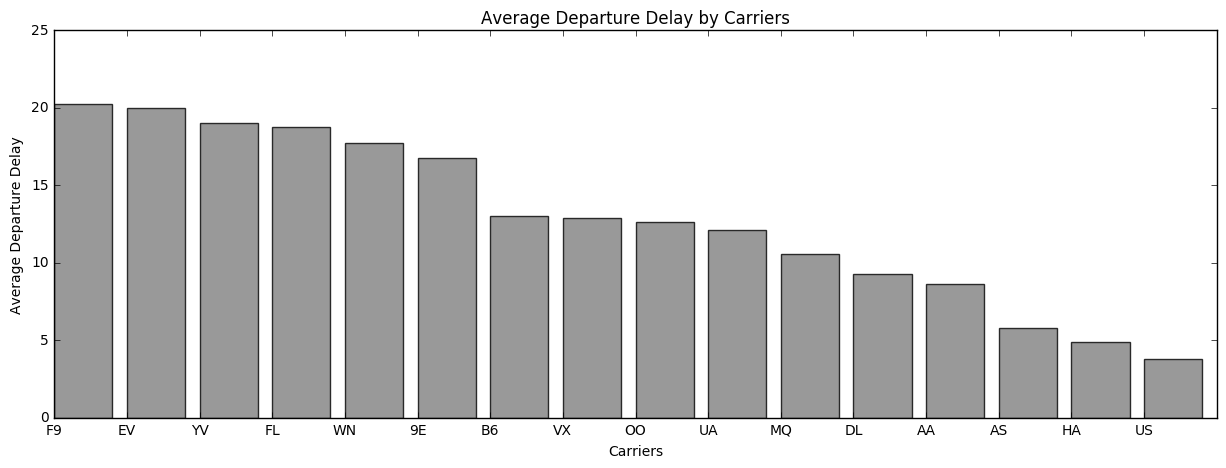

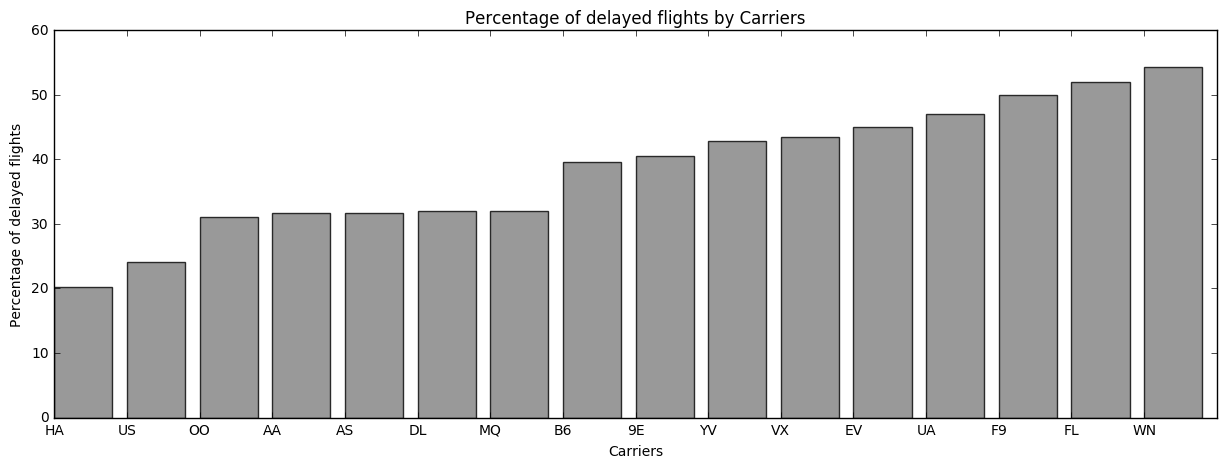

In [434]:
#Grouping and averaging the mean dealy by airline
avgairline = pd.DataFrame(flightsdf.groupby('carrier').mean().sort_values("dep_delay", ascending = False)).reset_index()

#Creating the plot
#Assigning figure size
plt.figure(figsize=[15,5])

#Bar chart
plt.bar(range(avgairline.shape[0]), avgairline["dep_delay"], alpha = 0.8, color = "gray")

#X axis
plt.xticks(range(avgairline.shape[0]), avgairline.carrier)
plt.xlabel("Carriers")

#Y axis
plt.ylabel("Average Departure Delay")

#Title
plt.title("Average Departure Delay by Carriers")
plt.show()

#Subsetting the rows with flight delays
delaycarrier=flightsdf[flightsdf['dep_delay']>0]

#Grouping using the carrier and counting the number of delayed flights
delaycarrier=pd.DataFrame(delaycarrier.groupby('carrier').count()).reset_index()

#Grouping using the carrier and counting the number of flights
delaycarr=pd.DataFrame(flightsdf.groupby('carrier').count()).reset_index()

#Calculating the percentage of delayed flights by carrier
delaycarrier['new2']=(delaycarrier.dep_delay/delaycarr.dep_delay)*100

#Sorting these values
delaycarrier = delaycarrier.sort_values("new2")

#Creating the plot
#Assigning figure size
plt.figure(figsize=[15,5])

#Bar chart
plt.bar(range(delaycarrier.shape[0]), delaycarrier["new2"], alpha = 0.8, color = "gray")

#X axis
plt.xticks(range(delaycarrier.shape[0]), delaycarrier.carrier)
plt.xlabel("Carriers")

#Y axis
plt.ylabel("Percentage of delayed flights")

#Title
plt.title("Percentage of delayed flights by Carriers")
plt.show()


On examining the fligths dataset, I strived to find a way to give a passenger critical information with which they could get the best flight experience. Hence, my research question was to evaluate the different airlines and rank them based on their performance so that passengers can make an informed choice.

To do this, I analyzed carriers by their mean departure delays and also the percentage of flights that were delayed.

I grouped the flights data by carrier and calcuated the mean for departure delay. This then anabled me to create a bar chart showing the average departure delays per carrier.

To get the percentage of flights delayed per carrier, I counted the number of delayed flights by carrier and then divided them by the number of total flights per carrier. This gave me a percentage of total flights delayed per carrier. I then created a bar chart to show this data.

On examining the plots, we notice that the carriers `HA` and `US` have performed well in both metrics whereas carriers like `WN`,`FL`,`F9` and `EV` have performed badly in both categories. 

Using this information it is possible for passengers to make a decision on which airlines travel on time more frequently and hence make an informed choice.

## Question 6
What weather conditions are associated with flight delays leaving NYC? Use graphics to explore.

In [435]:
#Taking in the flights data
flight=pd.read_csv('flights.csv')

#Taking in the weather data
weather=pd.read_csv('weather.csv')

#Merging the 2 datasets
merged=pd.merge(flight,weather,on = ['year','month','day','origin'], how = 'inner')

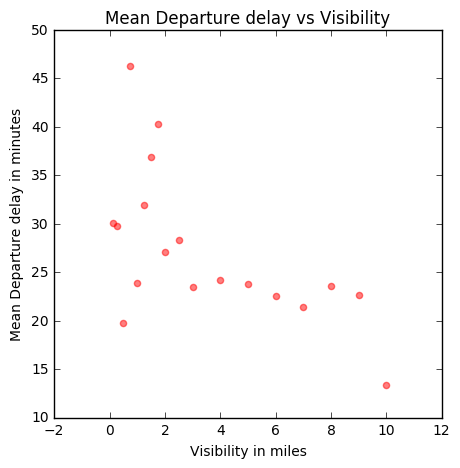

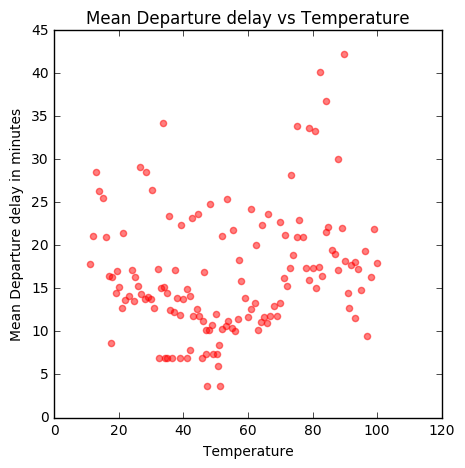

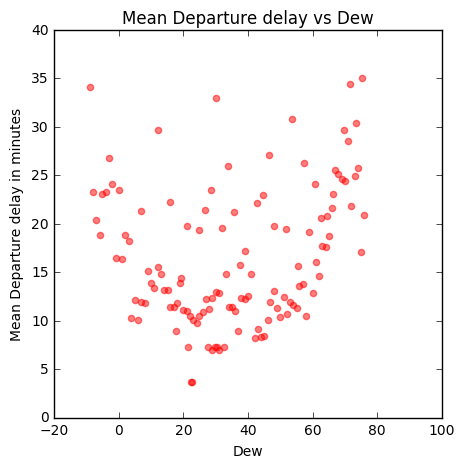

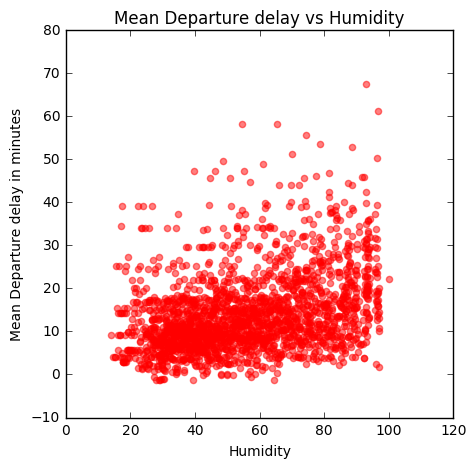

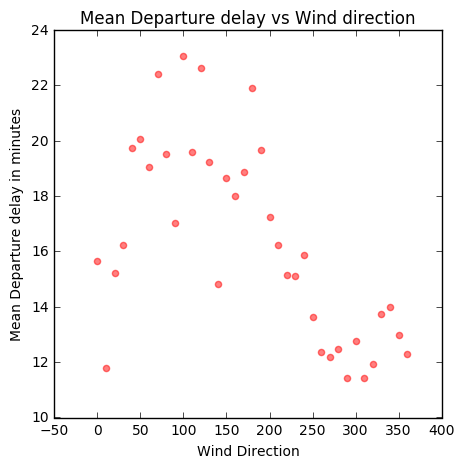

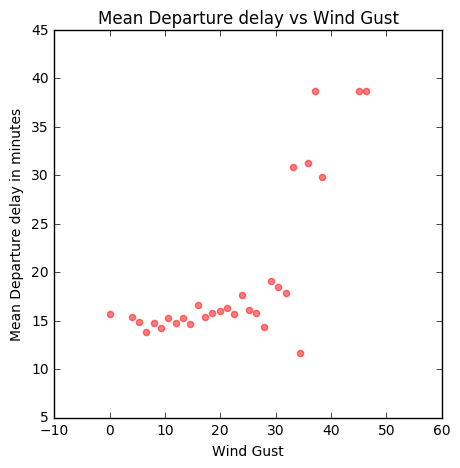

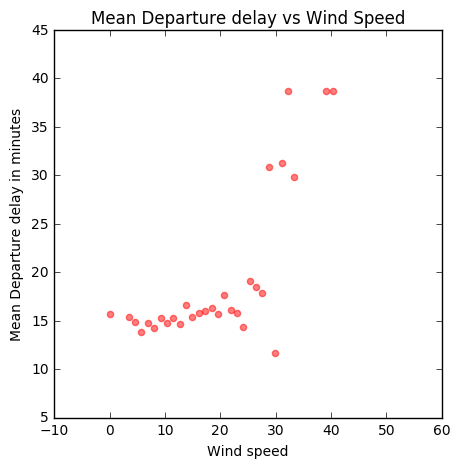

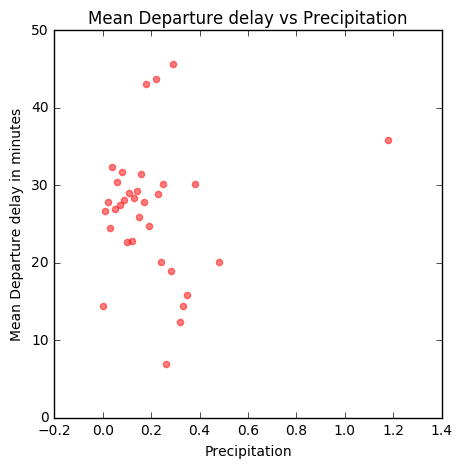

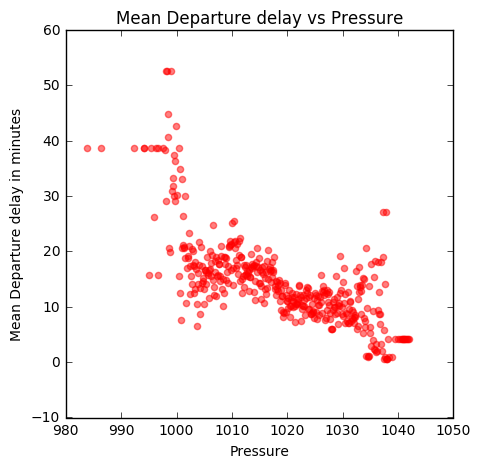

In [436]:
#Plot of departure delay vs visibility
plt.figure(figsize=[5,5])
pt=pd.DataFrame(merged.groupby('visib')['dep_delay'].mean())
pt['visib'] = pt.index
plt.scatter(pt.visib, pt.dep_delay,color = "red",alpha=0.5)
plt.xlabel("Visibility in miles")
plt.ylabel("Mean Departure delay in minutes")
plt.title("Mean Departure delay vs Visibility")

#Plot of departure delay vs temperature
plt.figure(figsize=[5,5])
pt=pd.DataFrame(merged.groupby('temp')['dep_delay'].mean())
pt['temp'] = pt.index
plt.scatter(pt.temp, pt.dep_delay,color = "red",alpha=0.5)
plt.xlabel("Temperature")
plt.ylabel("Mean Departure delay in minutes")
plt.title("Mean Departure delay vs Temperature")

#Plot of departure delay vs dew
plt.figure(figsize=[5,5])
pt=pd.DataFrame(merged.groupby('dewp')['dep_delay'].mean())
pt['dewp'] = pt.index
plt.scatter(pt.dewp, pt.dep_delay,color = "red",alpha=0.5)
plt.xlabel("Dew")
plt.ylabel("Mean Departure delay in minutes")
plt.title("Mean Departure delay vs Dew")

#Plot of departure delay vs humidity
plt.figure(figsize=[5,5])
pt=pd.DataFrame(merged.groupby('humid')['dep_delay'].mean())
pt['humid'] = pt.index
plt.scatter(pt.humid, pt.dep_delay,color = "red",alpha=0.5)
plt.xlabel("Humidity")
plt.ylabel("Mean Departure delay in minutes")
plt.title("Mean Departure delay vs Humidity")

#Plot of departure delay vs wind direction
plt.figure(figsize=[5,5])
pt=pd.DataFrame(merged.groupby('wind_dir')['dep_delay'].mean())
pt['wind_dir'] = pt.index
plt.scatter(pt.wind_dir, pt.dep_delay,color = "red",alpha=0.5)
plt.xlabel("Wind Direction")
plt.ylabel("Mean Departure delay in minutes")
plt.title("Mean Departure delay vs Wind direction")


#Plot of departure delay vs wind gust
plt.figure(figsize=[5,5])
pt=pd.DataFrame(merged.groupby('wind_gust')['dep_delay'].mean())
pt['wind_gust'] = pt.index
plt.scatter(pt.wind_gust, pt.dep_delay,color = "red",alpha=0.5)
axes = plt.gca()
axes.set_xlim([-10,60])
axes.set_ylim([5,45])
plt.xlabel("Wind Gust")
plt.ylabel("Mean Departure delay in minutes")
plt.title("Mean Departure delay vs Wind Gust")


#Plot of departure delay vs wind speed
plt.figure(figsize=[5,5])
pt=pd.DataFrame(merged.groupby('wind_speed')['dep_delay'].mean())
pt['wind_speed'] = pt.index
plt.scatter(pt.wind_speed, pt.dep_delay,color = "red",alpha=0.5)
axes = plt.gca()
axes.set_xlim([-10,60])
axes.set_ylim([5,45])
plt.xlabel("Wind speed")
plt.ylabel("Mean Departure delay in minutes")
plt.title("Mean Departure delay vs Wind Speed")

#Plot of departure delay vs precipitation
plt.figure(figsize=[5,5])
pt=pd.DataFrame(merged.groupby('precip')['dep_delay'].mean())
pt['precip'] = pt.index
plt.scatter(pt.precip, pt.dep_delay,color = "red",alpha=0.5)
plt.xlabel("Precipitation")
plt.ylabel("Mean Departure delay in minutes")
plt.title("Mean Departure delay vs Precipitation")

#Plot of departure delay vs pressure
plt.figure(figsize=[5,5])
pt=pd.DataFrame(merged.groupby('pressure')['dep_delay'].mean())
pt['pressure'] = pt.index
plt.scatter(pt.pressure, pt.dep_delay,color = "red",alpha=0.5)
plt.xlabel("Pressure")
plt.ylabel("Mean Departure delay in minutes")
plt.title("Mean Departure delay vs Pressure")

plt.show()

To showcase how departure delay is being affectde by weather trends, we merged the flights and weather datasets using the `year`, `month`, `day` and `origin` columns. On doing this we then grouped the dataset using each of the weather variables to get their mean delay and plotted them in a scatterplot. These were the results for each of the weather variables as observed through their scatterplots:

Visibility: As Visibility increases, we observe a decrease in the mean departure delay,
Temperature: It is difficult to find any discernable trend in relation to temperature,
Dew: It is difficult to find any discernable trend in relation to dew percentage,
Humidity: There is a slight increase in departure delay with an increase in humidity,
Wind Speed: There is a increase in mean departure delay with an increase in wind speed,
Wind Direction: It is difficult to find any discernable trend in relation to wind direction,
Wind Gust: There is a increase in mean departure delay with an increase in wind gust,
Precipitation: There is a slight increase in the mean departure delay with an increase in precipitation,
Pressure: There is a decrease in mean departure delay with an increase in pressure.